In [118]:
from sympy import *
from sympy.abc import n, i, N, x

init_printing()

In [119]:
p = Function('p')
y, c, z = IndexedBase('y'),IndexedBase('c'), IndexedBase('z')

In [120]:
fibonacci_poly = Eq(p(z), z**2 -z -1)
fibonacci_poly

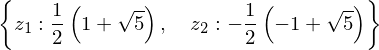

In [121]:
zs = solve(fibonacci_poly.rhs, [z])
zs ={z[i]:v for i, v in enumerate(map(factor, sorted(zs, reverse=True)), start=1)}
zs

In [122]:
solution = Eq(y[n], c[1]*z[1]**n + c[2]*z[2]**n)
solution

In [129]:
initial_conditions = {0:0, 1:1}
system = [solution.subs({n:k}).subs({y[k]:v}) for k, v in initial_conditions.items()]
system

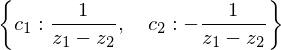

In [130]:
instantiated_sols = solve(system, [c[1],c[2]])
instantiated_sols

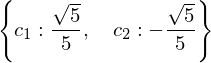

In [131]:
coeffs = {k: v.subs({z[1]:z1, z[2]:z2}).factor() for k,v in instantiated_sols.items()}
coeffs

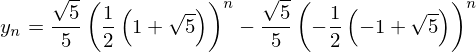

In [132]:
complete_sol = solution.subs(coeffs).subs(zs)
complete_sol

In [133]:
[complete_sol.subs(n,i).factor() for i in range(15)]